In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [6]:
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
data.head()

In [8]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
missing_values = data.isnull().sum()
missing_values

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [12]:
data.dropna(inplace=True)

In [14]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06,3.554549e+06
mean,2.075250e+00,3.612065e+01,-9.521825e+01,3.612085e+01,-9.521794e+01,8.477587e-01,6.107390e+01,5.974164e+01,6.377543e+01,2.935331e+01,9.051824e+00,7.442995e+00,5.601895e-03
std,3.837690e-01,5.352725e+00,1.801263e+01,5.352925e+00,1.801231e+01,1.823782e+00,1.939819e+01,2.168704e+01,2.292699e+01,1.137460e+00,2.579055e+00,5.588608e+00,5.116155e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-4.500000e+01,-6.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.318008e+01,-1.175560e+02,3.317923e+01,-1.175546e+02,6.700000e-02,4.800000e+01,4.600000e+01,4.700000e+01,2.919000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.604521e+01,-8.731360e+01,3.604546e+01,-8.731348e+01,2.640000e-01,6.300000e+01,6.300000e+01,6.600000e+01,2.972000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.013914e+01,-8.021014e+01,4.013945e+01,-8.020993e+01,9.240000e-01,7.600000e+01,7.600000e+01,8.300000e+01,2.997000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.748413e+01,4.907500e+01,-6.748413e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.000000e+02,1.087000e+03,2.400000e+01


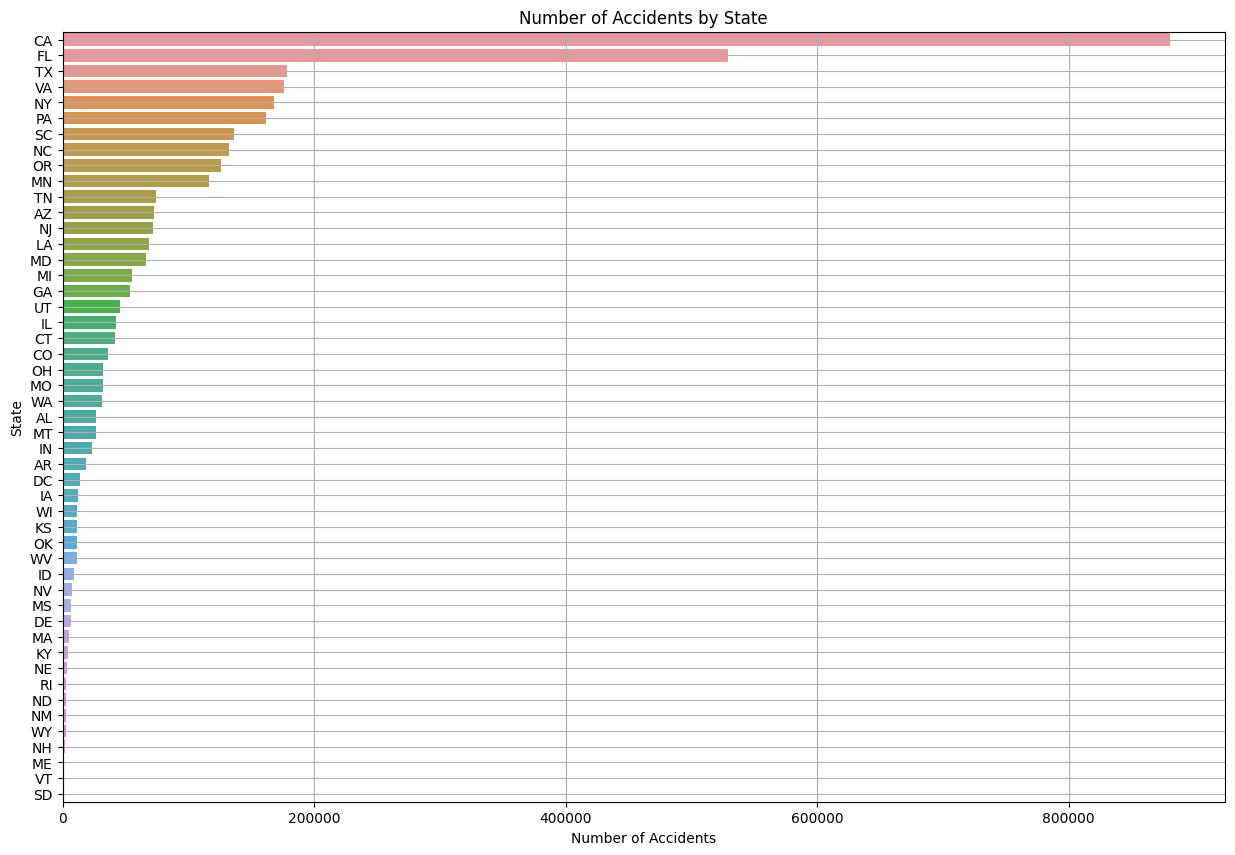

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(y='State', data=data, order=data['State'].value_counts().index)
plt.title('Number of Accidents by State')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.grid(True)
# plt.savefig('../images/accidents_by_state.png')
plt.show()

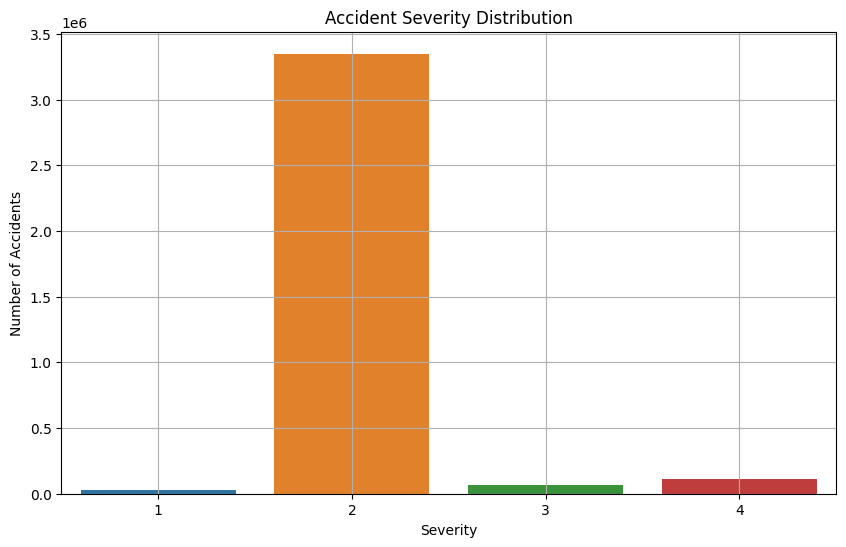

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=data)
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.grid(True)
# plt.savefig('../images/accident_severity_distribution.png')
plt.show()

In [20]:

data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


data.dropna(subset=['Start_Time'], inplace=True)

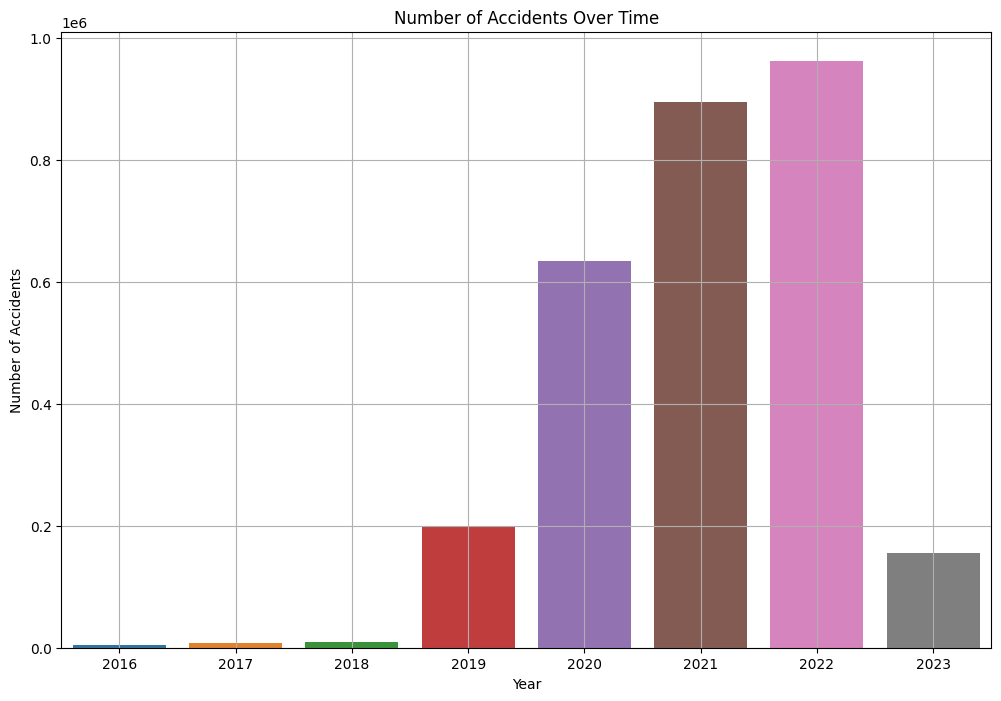

In [22]:
data['Year'] = data['Start_Time'].dt.year
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=data)
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
# plt.savefig('../images/accidents_over_time.png')
plt.show()

In [27]:
sample_data = data.sample(n=10000)
base_map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in sample_data.iterrows()]
HeatMap(heat_data).add_to(base_map)
# base_map.save('../images/accident_heatmap.html')

In [28]:
from IPython.display import IFrame
IFrame(base_map, width=700, height=500)